<a href="https://colab.research.google.com/github/priyatampintu/image-clssification-shirtsandtshrts/blob/master/Assignment_3(openCV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
filename = '/content/drive/My Drive/Colab Notebooks/cloth.zip'
with ZipFile (filename, 'r') as zip:
  zip.extractall()
  print('done')


done


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Activation,Dropout
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import os
import cv2

from imutils import paths
import matplotlib.pyplot as plt
from keras.preprocessing import image

from google.colab.patches import cv2_imshow

import argparse
import imutils

In [ ]:
test_dir='/content/cloth/test'
train_dir='/content/cloth/train'

train_dir_men_shrts = train_dir + '/men_shrts'
train_dir_men_tshrts = train_dir + '/men_tshrts'
test_dir_men_shrts = test_dir + '/men_shrts'
test_dir_men_tshrts = test_dir + '/men_tshrts'

In [ ]:
print('number of men_shrts training images - ',len(os.listdir(train_dir_men_shrts)))
print('number of men_tshrts training images - ',len(os.listdir(train_dir_men_tshrts)))
print('number of men_shrts testing images - ',len(os.listdir(test_dir_men_shrts)))
print('number of men_tshrts testing images - ',len(os.listdir(test_dir_men_tshrts)))

number of men_shrts training images -  700
number of men_tshrts training images -  700
number of men_shrts testing images -  100
number of men_tshrts testing images -  100


In [ ]:
#intialize the CNN model
model = Sequential()

model.add(Conv2D(32,(3,3), padding = 'same',
                input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
#initiate RMSProp optimizer and configure parameters
opt = keras.optimizers.rmsprop(lr=0.0001,decay = 1e-6)
#let's create our model
model.compile(loss = 'binary_crossentropy',optimizer = opt, metrics = ['accuracy'])

print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
activation_60 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_61 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 31, 31, 64)      

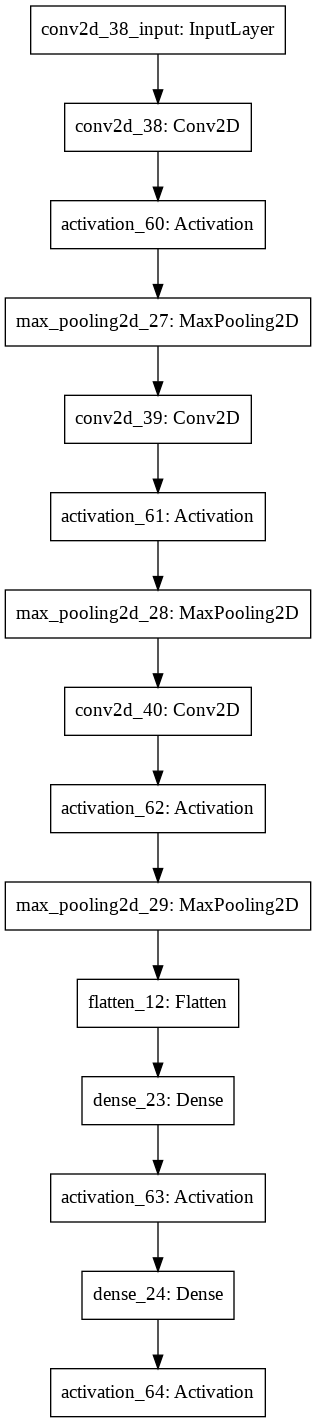

In [ ]:
keras.utils.plot_model(model,to_file= 'model.png')

**convert image into array and set target label of shirt and tshirt**

In [ ]:
#file_path = '/content/cloth'
train_data =[]
test_data = []

train_labels = []
test_labels = []
def image_array(file_path):

  for folder in os.listdir(file_path):
      #print(folder)
      if folder == 'train':
          sub_folder_path1 = os.path.join(file_path,folder)
          for sub_folder1 in os.listdir(sub_folder_path1):
              #print(sub_folder1)
              if sub_folder1 == 'men_shrts':
                  file_path1 = os.path.join(sub_folder_path1,sub_folder1)
                  for files in os.listdir(file_path1):
                      #print(files)
                      train_image_path = os.path.join(file_path1 ,files)
                      image = cv2.imread(train_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      train_data.append(image)
                      
                      label = 0
                      train_labels.append(label)
                      

              if sub_folder1 == 'men_tshrts':
                  file_path1 = os.path.join(sub_folder_path1,sub_folder1)
                  for files in os.listdir(file_path1):
                      #print(files)
                      train_image_path = os.path.join(file_path1 ,files)
                      image = cv2.imread(train_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      train_data.append(image)

                      label = 1
                      train_labels.append(label)
                      
      elif folder == 'test':
          sub_folder_path = os.path.join(file_path,folder)
          for sub_folder in os.listdir(sub_folder_path):
              #print(sub_folder)
              if sub_folder == 'men_shrts':
                  file_path2 = os.path.join(sub_folder_path,sub_folder)
                  for files in os.listdir(file_path2):
                      #print(files)
                      test_image_path = os.path.join(file_path2 ,files)
                      image = cv2.imread(test_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      test_data.append(image)
                      
                      label = 0 
                      test_labels.append(label)
                      
                  
              if sub_folder == 'men_tshrts':
                  file_path2 = os.path.join(sub_folder_path,sub_folder)
                  for files in os.listdir(file_path2):
                      #print(files)
                      test_image_path = os.path.join(file_path2 ,files)
                      image = cv2.imread(test_image_path)
                      image = cv2.resize(image, (128, 128))
                      image = img_to_array(image)
                      test_data.append(image)
                      
                      label = 1 
                      test_labels.append(label)
  return            

In [ ]:
image_array(input('enter image path '))


enter image path /content/cloth


In [ ]:
# scale the raw pixel intensities to the range [0, 1]
train_X = np.array(train_data, dtype="float") / 255.0
train_y = np.array(train_labels)

test_X = np.array(test_data, dtype="float") / 255.0
test_y = np.array(test_labels)

# convert the labels from integers to vectors
trainY = to_categorical(train_y, num_classes=2)
testY = to_categorical(test_y, num_classes=2)

In [ ]:
history= model.fit(train_X,trainY,batch_size=32,
                             validation_data = (test_X, testY),
                epochs = 25,
                   verbose=1)

Train on 1400 samples, validate on 200 samples
Epoch 1/25
1400/1400 [==============================] - 2s 1ms/step - loss: 0.5889 - accuracy: 0.6929 - val_loss: 0.4038 - val_accuracy: 0.8200
Epoch 2/25
1400/1400 [==============================] - 1s 760us/step - loss: 0.3903 - accuracy: 0.8321 - val_loss: 0.2361 - val_accuracy: 0.9250
Epoch 3/25
1400/1400 [==============================] - 1s 757us/step - loss: 0.2807 - accuracy: 0.8936 - val_loss: 0.1793 - val_accuracy: 0.9250
Epoch 4/25
1400/1400 [==============================] - 1s 755us/step - loss: 0.2245 - accuracy: 0.9143 - val_loss: 0.2803 - val_accuracy: 0.8550
Epoch 5/25
1400/1400 [==============================] - 1s 755us/step - loss: 0.1834 - accuracy: 0.9329 - val_loss: 0.1511 - val_accuracy: 0.9300
Epoch 6/25
1400/1400 [==============================] - 1s 760us/step - loss: 0.1558 - accuracy: 0.9436 - val_loss: 0.1540 - val_accuracy: 0.9400
Epoch 7/25
1400/1400 [==============================] - 1s 760us/step - loss: 0

**plot the loss and accuracy of training and testing**

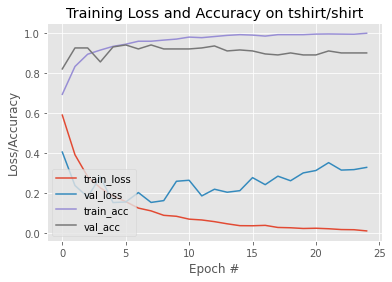

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = 25
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on tshirt/shirt")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

**save model**

In [ ]:
model.save('image_class_25_epoch.h5')
print('model saved')

model saved


**load model**

In [ ]:
from keras.models import load_model
classifier = load_model('image_class_25_epoch.h5')

**predict test or unseen image data and their accuracy**

In [ ]:
def predict_image(image_path):
  
  # load the image
  image = cv2.imread(image_path)
  orig = image.copy()
  # pre-process the image for classification
  image = cv2.resize(image, (128, 128))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  # classify the input image
  shrt, tshrt = classifier.predict(image)[0]

  # build the label
  label = "tshirt" if tshrt > shrt else "shirt"
  proba = tshrt if tshrt > shrt else shrt
  label = "{}: {:.2f}%".format(label, proba * 100)

  # draw the label on the image
  output = imutils.resize(orig, width=400)
  cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
    0.7, (0, 255, 0), 2)
  
  # show the output image
  cv2_imshow( output)
  cv2.waitKey(0)
  
  return


enter image path to predict category /content/drive/My Drive/Colab Notebooks/img_50.jpeg


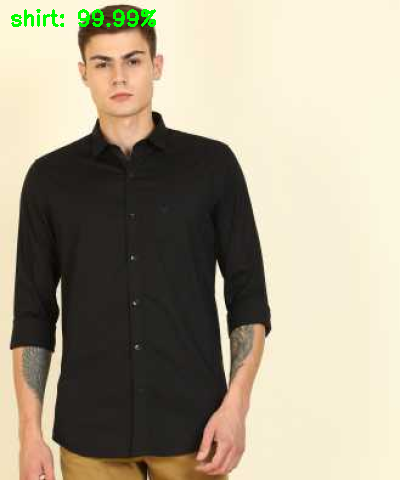

In [ ]:
predict_image(input('enter image path to predict category '))